In [10]:
#Là on va juste avoir une régression linéaire avec plusieurs paramètres 
#et pas qu'un seul

import numpy as np

#On va générer des données aléatoires(notre dataset) avec lesquelles travailler 
from sklearn.datasets import make_regression
#Pour faire des graphes
import matplotlib.pyplot as plt

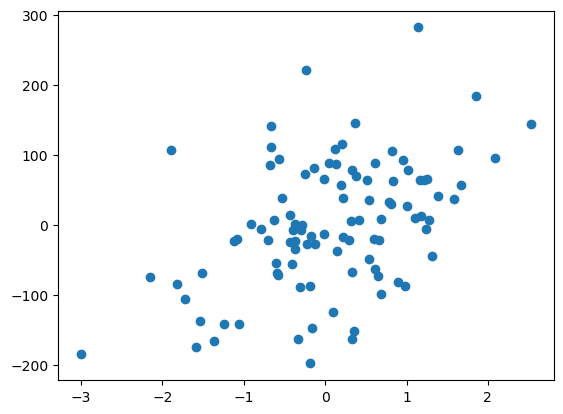

In [11]:
#**Dataset** on met n_features=2 au lieu de 1 sur les précédents projets 
x, y = make_regression(n_samples=100, n_features=2, noise=10)
#Représentation de y en fonction de x indice 0 parsk on peut pas toutes les voir en méme temps
plt.scatter(x[:,0], y )

In [12]:
#On va vérifier les dimensions de nos matrices
print(x.shape)
print(y.shape)

(100, 2)
(100,)


In [14]:
#C'est normal que le vecteur y fourni par make regression n'ait pas de 
#dimensions bien définies; On va donc redimensionner y avec reshape
#et on va réutiliser sa dimension en x et puis définir celle en y à 1
y=y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)


(100, 2)
(100, 1)


In [19]:
#Là on voit qu'on a bien les x0 et les x1 dans la matrice X pour le moment 
#On va créer la matrice X avec la colonne de  1 qu'il lui faut 
#mais là on a un changement à faire pour ne pas avoir 2 colonnes de 1 
#donc matrice ones avec la taille de X en ligne mais avec qu'une seule colonne
X= np.hstack((x, np.ones((x.shape[0],1))))
X
print(X)
print(X.shape)


[[-0.59411784 -0.35576223  1.        ]
 [ 1.8540002   1.29347163  1.        ]
 [ 0.51308522  0.38869562  1.        ]
 [ 0.97607303 -1.68399763  1.        ]
 [ 1.38472168 -0.37762977  1.        ]
 [ 0.10124268 -1.70039829  1.        ]
 [-1.36175933 -1.10342627  1.        ]
 [-1.89806093  2.32283194  1.        ]
 [ 0.29173414 -0.34794469  1.        ]
 [ 1.09840221 -0.21732603  1.        ]
 [-0.31296216 -0.93865108  1.        ]
 [-1.72037142 -0.24321172  1.        ]
 [ 1.17820926 -0.58569317  1.        ]
 [ 0.21399644 -0.1854672   1.        ]
 [-1.5840516  -1.2662898   1.        ]
 [ 0.60887228 -1.25225092  1.        ]
 [ 1.21808041  0.19627653  1.        ]
 [ 0.66427879 -0.55462002  1.        ]
 [ 0.9513034   0.47464405  1.        ]
 [-0.15559441 -1.76780995  1.        ]
 [-0.14309789  1.11573694  1.        ]
 [-1.54206401 -0.71373583  1.        ]
 [ 0.36339409  1.82450225  1.        ]
 [-3.00626661 -0.67678545  1.        ]
 [-1.08499876  0.51160032  1.        ]
 [-0.67969762  1.23639751

In [20]:
#theta de dimension 3,1 (a,b,c) car on voit que le dataset n'est pas linéaire
#pour qui on doit donner des valeurs aléatoires

theta=np.random.randn(3, 1)
theta

array([[-0.5475428 ],
       [-1.06998215],
       [-1.64883641]])

In [23]:
#On va définir notre modèle qui est une fonction qui dépend des arguments X et theta
def model(X, theta):
    return X.dot(theta)
# instructions c'est juste produit entre X et theta

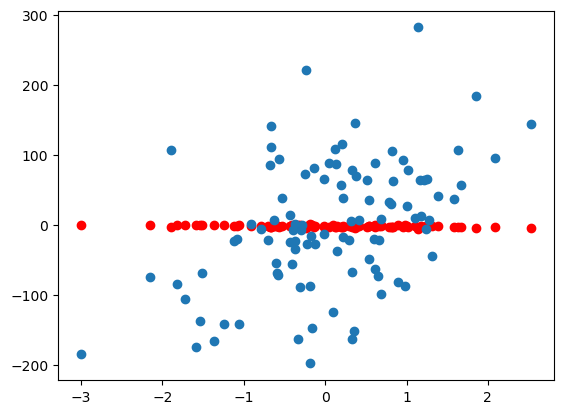

In [26]:
#On va comparer la droite de notre modèle avec la réalité soit les points que pour x indice 0
plt.scatter(x[:,0], model(X, theta), c='r')
plt.scatter(x[:,0], y) 

In [27]:
#On définit notre fonction cout
#m est le nombre d'exemples lié à la taille(length) de y
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [28]:
cost_function(X,y, theta)

4297.993835601894

In [29]:
#On définit notre fonction gradient avec la formule de base le T veut dire transposée
#dot c'est multiplication S/O la formule des maths
def grad(X, y , theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
    

In [30]:
#Fonction descente de gradients qui dépend aussi dun learning
#rate les pas qu'on fait pour descendre la vallée et trouver le point le plus bas
def gradient_descent(X,y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
#Algorithme itératif, on va répéter l'opération plusieurs fois en mettant à jour theta
#donc boucle for
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y, theta)
        cost_history[i]= cost_function(X, y, theta)

    return theta, cost_history

In [31]:
theta.shape

(3, 1)

In [32]:
theta_final, cost_history= gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [33]:
theta_final


array([[42.69913057],
       [81.49386049],
       [-0.48783874]])

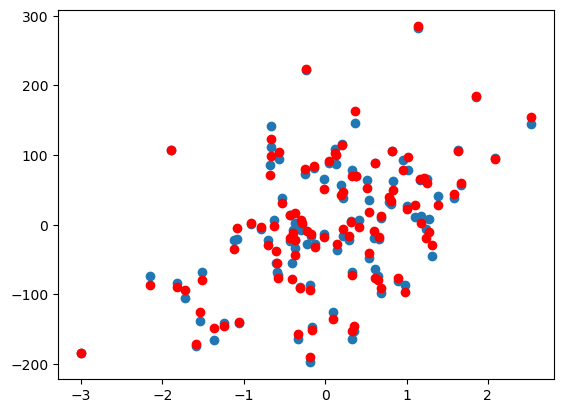

In [36]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

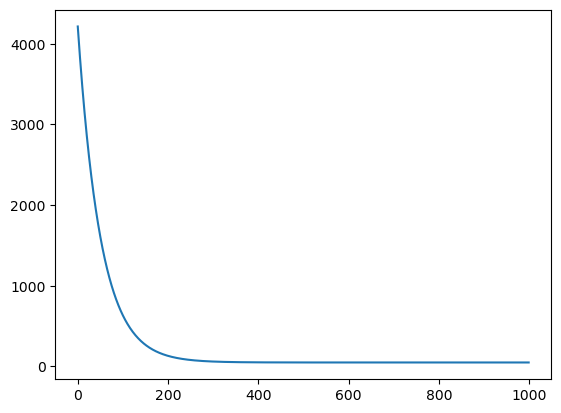

In [37]:
plt.plot(range(1000), cost_history)

In [38]:

def coef_determination(y, predictions):
    #En général on la scinde en 2 variables u et v 
    u= ((y - predictions)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - u/v

In [39]:
coef_determination(y, predictions)

0.9886181837268767

In [ ]:
#Très proche de 1 donc oklm
#On a regardé les bails pour la première variable x0 du coup faut juste remplacer les
#"x[:,0] par x[:,1] 
#pour regarder l'autre variable parsk pour la représentation faudrait étre en 3D